# Chapter 3 Carseats

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np 

import statsmodels.api as sm
from statsmodels.stats import anova

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

from matplotlib.pyplot import subplots

Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

This question should be answered using the Carseats data set.

Sales of Child Car Seats
A simulated data set containing sales of child car seats at 400 different stores.

- **Sales**: Unit sales (in thousands) at each location
- **CompPrice**: Price charged by competitor at each location
- **Income**: Community income level (in thousands of dollars)
- **Advertising**: Local advertising budget for company at each location (in thousands of dollars)
- **Population**: Population size in region (in thousands)
- **Price**: Price company charges for car seats at each site
- **ShelveLoc**: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- **Age**: Average age of the local population
- **Education**: Education level at each location
- **Urban**: A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- **US**: A factor with levels No and Yes to indicate whether the store is in the US or not

(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [9]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats) 
y = Carseats['Sales']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           2.39e-23
Time:                        15:29:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.0

(b) Provide an interpretation of each coefficient in the model. Be careful some of the variables in the model are qualitative!

**Price** has a negative coefficient of -0.0545. It can be read as fir each dolar added to the price, we can expect a drop in sales of 0.0545 (k) units.

For shops located in **urban** areas we expect 0.0219 (k) sales less. There is, though, very little proof of this factor to have a statistically significant impact explaining the sales.

Shops located in the **US** can expect 1.2006 (k) sales units more.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

if not urban and not US:

    - sales = 13.0435 - (0.0545*price)

if urban and not US: 

    - sales = 13.0435 - (0.0545*price) - 0.0219

if not urban and US: 

    - sales = 13.0435 - (0.0545*price) + 1.2006   

if urban and US:

    - sales = 13.0435 - (0.0545*price) - 0.0219 + 1.2006  


(d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

Urban. Its p value is very high.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [17]:
X2 = MS(['Price', 'US']).fit_transform(Carseats) 
y = Carseats['Sales']

model2 = sm.OLS(y, X2)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           2.66e-24
Time:                        15:28:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

They seem to explain the same amount of variablility (23,9%)

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [21]:
results2.conf_int(0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

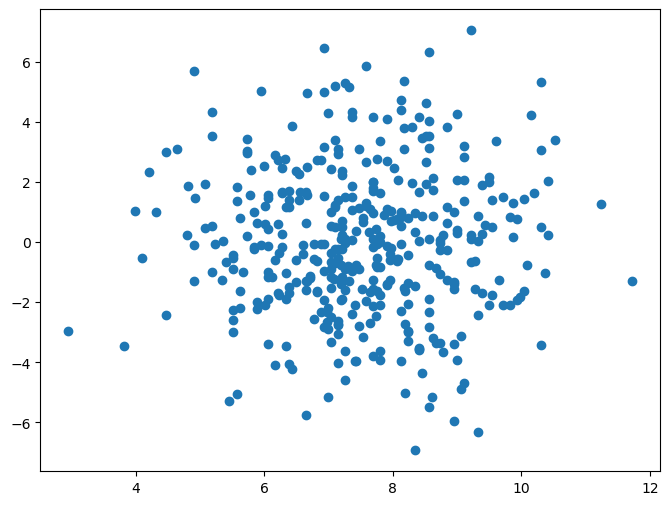

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(results2.fittedvalues, results2.resid)
plt.show()

The fitted vs residuals plot doesnt show any homocedasticity, non linearity, outliers or any other kind of issue.